# Proyecto 03 - Panorama
Integrantes:
- Sara Echeverría 21371
- Melissa Pérez 21385
- Ricardo Mendez 21289

Repositorio: https://github.com/bl33h/panoramaBuilder

In [1]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt

### 01. Images

In [2]:
def load_images(paths):
    return [cv2.imread(p) for p in paths]

In [3]:
image_paths = ['./img/1_1.png', './img/1_2.png', './img/1_3.png', './img/1_4.png']
images = load_images(image_paths)

### 02. Matching pairs

In [4]:
def detect_and_match(img1, img2):
    orb = cv2.ORB_create(5000)
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = matcher.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
    pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)
    
    H, mask = cv2.findHomography(pts2, pts1, cv2.RANSAC)
    return H, mask, kp1, kp2, matches

In [5]:
def build_homographies(images, detect_and_match_fn):
    n = len(images)
    base_idx = n // 2
    Hs = [None] * n
    Hs[base_idx] = np.eye(3)

    for i in range(base_idx - 1, -1, -1):
        H, _, _, _, _ = detect_and_match_fn(images[i + 1], images[i])
        Hs[i] = Hs[i + 1] @ H

    for i in range(base_idx + 1, n):
        H, _, _, _, _ = detect_and_match_fn(images[i - 1], images[i])
        Hs[i] = Hs[i - 1] @ np.linalg.inv(H)

    return Hs

In [6]:
Hs = build_homographies(images, detect_and_match)


In [7]:
def show_matching_pairs(images):
    orb = cv2.ORB_create(5000)
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    for i in range(len(images) - 1):
        img1 = images[i]
        img2 = images[i + 1]

        # keypoints y descriptores
        kp1, des1 = orb.detectAndCompute(img1, None)
        kp2, des2 = orb.detectAndCompute(img2, None)

        # matching de descriptores
        matches = matcher.match(des1, des2)
        matches = sorted(matches, key=lambda x: x.distance)[:50]

        # dibujar matches
        img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches, None,
                                    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        plt.figure(figsize=(12, 6))
        plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
        plt.title(f'Matching entre {i} y {i + 1}')
        plt.axis('off')
        plt.show()

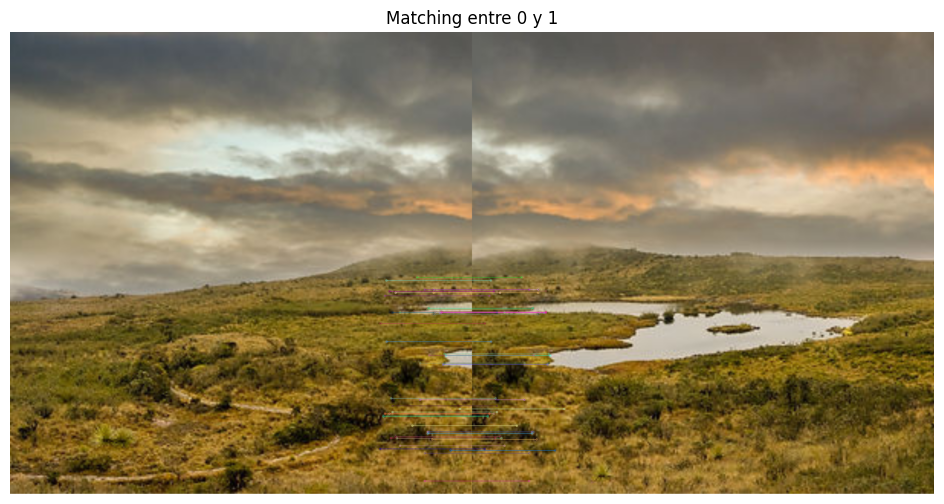

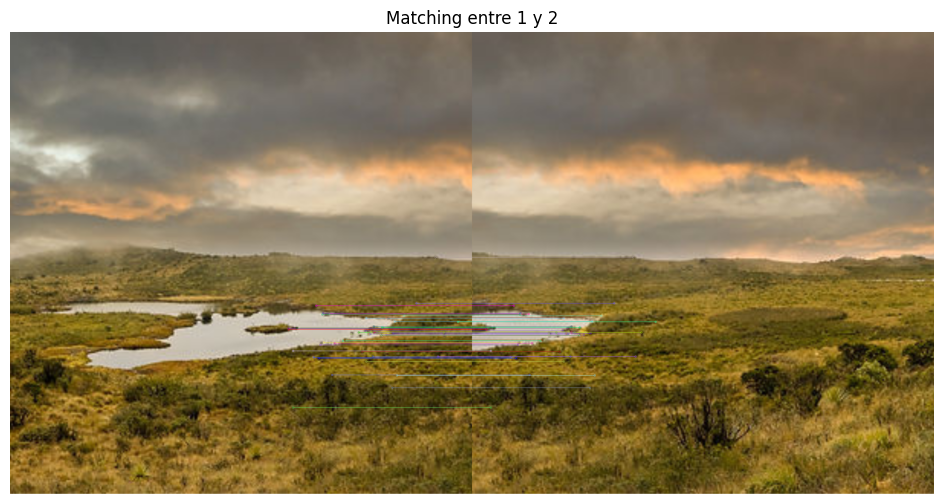

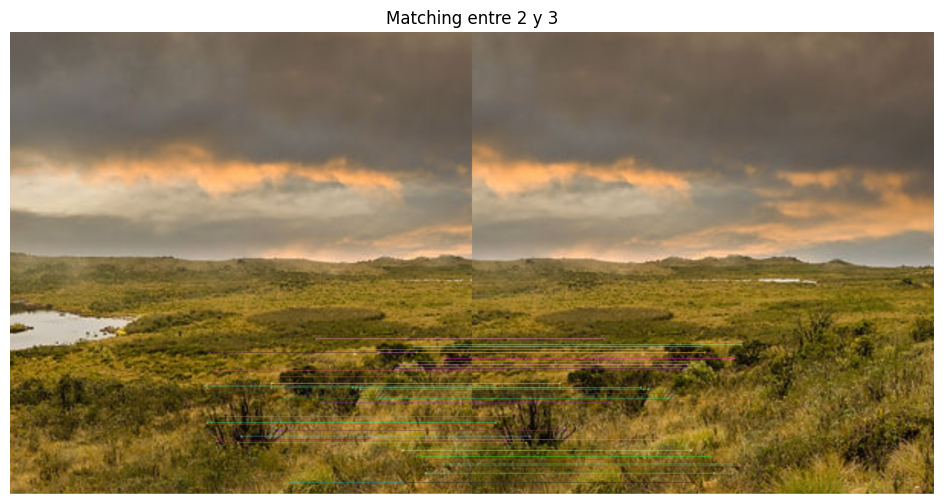

In [8]:
show_matching_pairs(images)

### 03. Wrapping

### 04. Blending

## Result